In [17]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model, load_model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
(x_train,_),(x_test,_) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [11]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [12]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

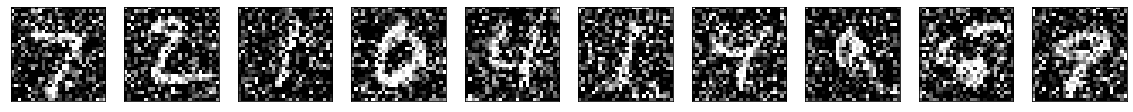

In [13]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [60]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same', name='layer_1')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same', name='layer_2')(x)
shape_before_flattening = K.int_shape(x)
x = Flatten()(x)
x = Dense(32, activation='relu', name='layer_3')(x)
encoded = Dense(2, activation='relu', name='layer_4')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)
# decoder_input = Input(shape=(K.int_shape(encoded)[1:]))
# decoder_input = K.int_shape(encoded)

# print(decoder_input[1:])
# print(shape_before_flattening[1:])

# decoder_input = Input(K.int_shape(encoded)[1:])
x = Dense(32, activation='relu')(encoded)
x = Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu', name='layer_5')(x)
x = Reshape(shape_before_flattening[1:])(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same', name='layer_6')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='layer_7')(x)
# x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='layer_8')(x)
# print(K.int_shape(decoded)[1:])

# print(decoder_input)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
# decoder = Model(decoder_input, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [61]:
autoencoder.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 14, 14, 2)         578       
_________________________________________________________________
flatten_28 (Flatten)         (None, 392)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 32)                12576     
_________________________________________________________________
layer_4 (Dense)              (None, 2)                 66 

In [62]:
x_test.shape

(10000, 28, 28, 1)

In [63]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2708 - val_loss: 0.2310
Epoch 2/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2284 - val_loss: 0.2250
Epoch 3/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2226 - val_loss: 0.2195
Epoch 4/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2190 - val_loss: 0.2187
Epoch 5/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2162 - val_loss: 0.2140
Epoch 6/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2138 - val_loss: 0.2126
Epoch 7/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.2122 - val_loss: 0.2116
Epoch 8/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2107 - val_loss: 0.2103
Epoch 9/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2098 - val_

60000/60000 [==============================] - 6s 99us/step - loss: 0.1896 - val_loss: 0.1911
Epoch 77/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1895 - val_loss: 0.1910
Epoch 78/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1895 - val_loss: 0.1915
Epoch 79/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1893 - val_loss: 0.1904
Epoch 80/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1894 - val_loss: 0.1918
Epoch 81/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1892 - val_loss: 0.1898
Epoch 82/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1891 - val_loss: 0.1914
Epoch 83/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1889 - val_loss: 0.1914
Epoch 84/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1890 - val_loss: 0.1896
Epoch 85/100
60000/60000 [===================

In [64]:
autoencoder.save("unsuper_numbers_3.h5")
encoder.save("encode_numbers_3.h5")

In [66]:
x_test_recons = autoencoder.predict(x_test, batch_size=10)

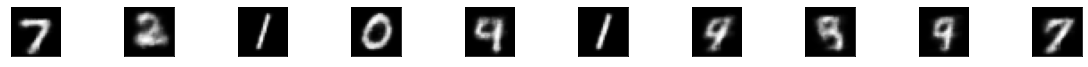

In [67]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    ax.imshow(x_test[i].reshape(28, 28))
#     ax.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax_1 = plt.subplot(2, n, i+1)
    ax_1.imshow(x_test_recons[i].reshape(28, 28))
#     ax_1.gray()
    ax_1.get_xaxis().set_visible(False)
    ax_1.get_yaxis().set_visible(False)
plt.show()

In [68]:
# !ls
# encoder = load_model('encode_numbers_2.h5')

In [69]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [70]:
x_test_encoded = encoder.predict(x_test, batch_size=10)
# test_0 = np.reshape(x_test[0], (1, 28, 28, 1))
# x_test_encoded = encoder.predict(test_0)
# plt.imshow(x_test[0].squeeze())
# plt.show()
# plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=x_test)
# plt.colorbar()
# plt.show()

In [74]:
# plt.imshow(x_test_encoded[0][:,:,4])
# plt.show()
(x_test_encoded[:,0].shape)
# plt.scatter(x_test_encoded[:,0],x_test_encoded[:,1])

(10000,)

In [7]:
test = []
for i in range(len(x_test_encoded)):
    test.append(x_test_encoded[i].flatten())
test = np.array(test)
print((test).shape)
# print(x_test_encoded[0:999].shape)

(10000, 98)


In [73]:
# !ls
# x_test_encoded[0].shape
# x_test_encoded.shape
# print(len(x_test))

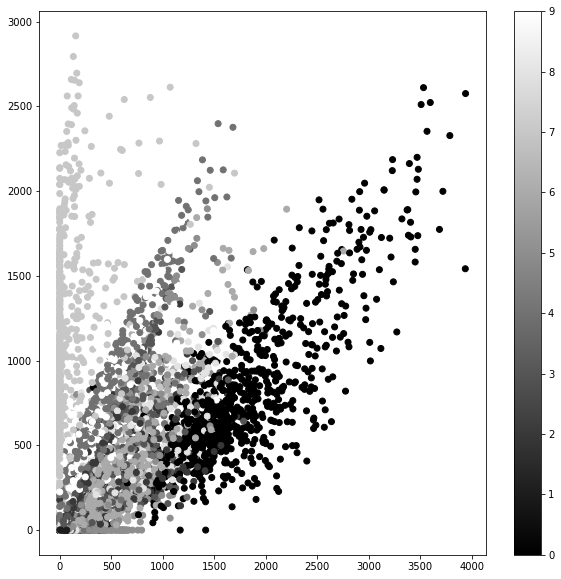

In [76]:
plt.figure(figsize=(10, 10))
# plt.scatter(x_test_encoded[:,1][:,:,0], x_test_encoded[:,1][:,:,1], c = x_test_encoded[:,1][:,:,0])
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test)
plt.colorbar()
plt.show()